**Autor: Alan Ramos Pérez**

**Matrícula: 202249434**


Se realizó un análisis de datos sobre sismos en México con el objetivo de predecir el estado ('Estatus') de cada evento sísmico a partir de sus características numéricas. Utilizando técnicas de clasificación supervisada, se entrenó un modelo K-Nearest Neighbors (KNN) que logró una precisión del 71.44% en el conjunto de prueba. El modelo mostró un buen desempeño en la identificación de la clase positiva, con una sensibilidad del 87.81% y una puntuación F1 de 81.78%, lo que indica una veracidad aceptable en sus predicciones.




In [13]:
%matplotlib inline

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors, datasets
import numpy as np
import pandas as pd
#usaremos una base de datos de sismos en México
my_dat=pd.read_csv('sismos.csv',skiprows=4,skipfooter=7, engine='python')
my_dat.head()


,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,2024-01-01,00:15:51,3.2,18.7483,-104.6020,16.5,"45 km al SUROESTE de MANZANILLO, COL",2024-01-01,06:15:51,revisado
1,2024-01-01,00:30:39,4.3,15.5482,-95.8245,16.1,"41 km al SURESTE de CRUCECITA, OAX",2024-01-01,06:30:39,revisado
2,2024-01-01,00:53:59,3.1,19.5943,-102.4950,5.3,"2 km al OESTE de LOS REYES DE SALGADO, MICH",2024-01-01,06:53:59,revisado
3,2024-01-01,01:09:24,3.2,18.4185,-100.4230,55.4,"19 km al NOROESTE de ARCELIA, GRO",2024-01-01,07:09:24,revisado
4,2024-01-01,01:16:57,3.1,19.7267,-104.6570,54.0,"27 km al NOROESTE de CASIMIRO CASTILLO, JAL",2024-01-01,07:16:57,revisado


In [15]:
# Mostrar los tipos de datos de cada columna
print("Tipos de datos:\n")
display(my_dat.dtypes)

# Mostrar estadísticas descriptivas de las columnas numéricas
print("Estadísticas descriptivas:\n")
display(my_dat.describe())

# Mostrar estadísticas descriptivas de las columnas no numéricas
print("Estadísticas descriptivas de columnas no numéricas:")
display(my_dat.describe(include='object'))

Tipos de datos:



Fecha                          object
Hora                           object
Magnitud                      float64
Latitud                       float64
Longitud                      float64
Profundidad                    object
Referencia de localizacion     object
Fecha UTC                      object
Hora UTC                       object
Estatus                        object
dtype: object

Estadísticas descriptivas:



,Magnitud,Latitud,Longitud
count,17522.000000,17522.000000,17522.000000
mean,3.496028,20.115196,-102.053611
std,0.375021,5.839813,7.599604
min,1.000000,12.790000,-118.321000
25%,3.300000,16.260000,-105.833000
50%,3.500000,17.236300,-99.540000
75%,3.700000,20.334250,-95.330000
max,6.200000,32.650000,-90.910000


Estadísticas descriptivas de columnas no numéricas:


,Fecha,Hora,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
count,17522,17522,17522,17522,17522,17522,17522
unique,225,15863,1621,9813,225,15863,2
top,2024-05-27,21:41:29,10.0,"80 km al NOROESTE de SAN FELIPE, BC",2024-07-07,03:41:29,verificado
freq,222,4,1541,135,196,4,12747


# Objetivo
Analizar los datos de sismos en México utilizando técnicas de clasificación, específicamente el clasificador k-nearest neighbors, para predecir el 'Estatus' de un sismo basándose en sus características numéricas ('Magnitud', 'Latitud', 'Longitud', 'Profundidad').


Convertir la columna 'Profundidad' a un tipo numérico, manejando posibles errores.


Se convierte la columna 'Profundidad' a tipo numérico, forzando los errores a NaN según lo indicado.



In [16]:
my_dat['Profundidad'] = pd.to_numeric(my_dat['Profundidad'], errors='coerce')
display(my_dat.dtypes)

Fecha                          object
Hora                           object
Magnitud                      float64
Latitud                       float64
Longitud                      float64
Profundidad                   float64
Referencia de localizacion     object
Fecha UTC                      object
Hora UTC                       object
Estatus                        object
dtype: object

## Seleccionar características y objetivo

Definir las columnas numéricas ('Magnitud', 'Latitud', 'Longitud', 'Profundidad' numérica) como características (X) y la columna 'Estatus' como el objetivo (y).


In [17]:
X = my_dat[['Magnitud', 'Latitud', 'Longitud', 'Profundidad']]
y = my_dat['Estatus']

display(X.head())
display(y.head())

,Magnitud,Latitud,Longitud,Profundidad
0,3.2,18.7483,-104.6020,16.5
1,4.3,15.5482,-95.8245,16.1
2,3.1,19.5943,-102.4950,5.3
3,3.2,18.4185,-100.4230,55.4
4,3.1,19.7267,-104.6570,54.0


0    revisado
1    revisado
2    revisado
3    revisado
4    revisado
Name: Estatus, dtype: object

## Codificar la variable objetivo

Convertir la variable objetivo categórica ('Estatus') a valores numéricos.



Usamos Label Enconding para pasar los valores de texto como "Estatus" a valores numéricos.

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

display(y[:5])
display(np.unique(y))

array([0, 0, 0, 0, 0])

array([0, 1])

## Dividir los datos

Dividir el conjunto de datos en conjuntos de entrenamiento y prueba.


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (14017, 4)
Shape of X_test: (3505, 4)
Shape of y_train: (14017,)
Shape of y_test: (3505,)


## Entrenar un clasificador k-nearest neighbors

Se entrena un modelo KNN con los datos de entrenamiento.


Es necesario manejar estos valores faltantes antes de entrenar el modelo KNN. Podemos usar SimpleImputer para rellenar los valores faltantes  con la media de las respectivas columnas en el conjunto de entrenamiento y luego transformaré tanto el conjunto de entrenamiento como el de prueba.

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_imputed, y_train)




KNeighborsClassifier()

## Evaluar el modelo
Predecir sobre el conjunto de prueba y evaluar el rendimiento del clasificador utilizando métricas de clasificación.


Se harán predicciones sobre el conjunto de prueba y se evaluará el modelo utilizando distintas métricas.

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = knn.predict(X_test_imputed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7144
Precision: 0.7653
Recall: 0.8781
F1 Score: 0.8178


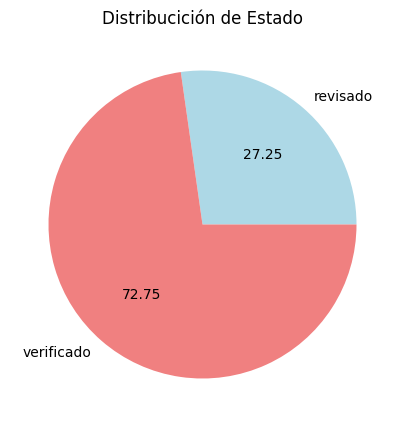

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que 'y' ya está codificada como 0 y 1
# Necesitamos contar las ocurrencias de cada clase
class_counts = np.bincount(y)

# Definir las etiquetas basadas en los valores únicos de la columna original 'Estatus'
# Se asume que 0 corresponde al primer valor único y 1 al segundo
original_labels = my_dat['Estatus'].unique()
labels = [original_labels[i] for i in np.unique(y)]


plt.rc('text', usetex=False)
plt.pie(class_counts,
        labels=labels,
        colors=['lightblue', 'lightcoral'],
        shadow=False,
        autopct ='%.2f' )
plt.gcf().set_size_inches((5,5))
plt.title('Distribucición de Estado')
plt.show()

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import neighbors, svm, tree
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)
y_encoded = y #

# Definir clasificadores
classifiers = {
    "1-NN": neighbors.KNeighborsClassifier(n_neighbors=1),
    "3-NN": neighbors.KNeighborsClassifier(n_neighbors=3),
    "SVM": svm.SVC(),
    "Decision Tree": tree.DecisionTreeClassifier()
}

# Validación cruzada
n_folds = 10
acc_r = []

for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_imputed, y_encoded, cv=n_folds, scoring="accuracy")
    acc_r.append(scores)

# Convertir a array: n_folds x n_classifiers
acc_r = np.array(acc_r).T

# Crear figura
plt.figure(figsize=(12,8))
plt.boxplot(acc_r, tick_labels=list(classifiers.keys()))

# Agregar puntos individuales con jitter
n_reps, n_class = acc_r.shape
for j in range(n_class):
    x_jitter = (j+1) + (np.random.rand(n_reps)-0.5)*0.2  # jitter horizontal
    plt.scatter(x_jitter, acc_r[:, j], color="red", alpha=0.6)

plt.ylabel("Accuracy")
plt.title(f"Comparación de clasificadores ({n_folds}-fold CV)")
plt.show()

TypeError: boxplot() got an unexpected keyword argument 'tick_labels'

<Figure size 1200x800 with 0 Axes>

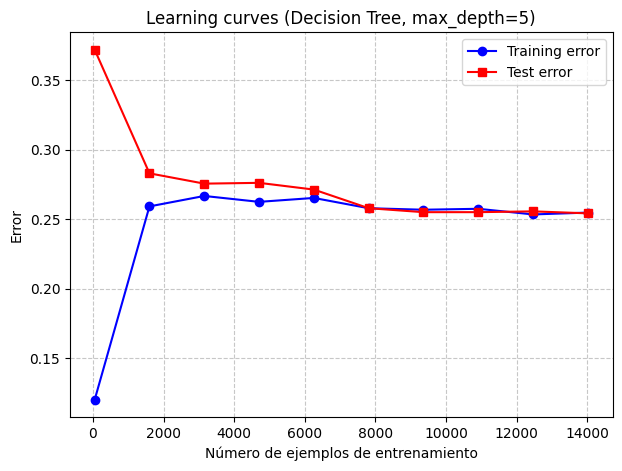

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Re-impute the data to ensure no NaNs
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)
y_encoded = y # y is already label encoded

# Split data into train/test sets
X_train_imp, X_test_imp, y_train_enc, y_test_enc = train_test_split(X_imputed, y_encoded, test_size=0.2, random_state=42)


# Configuración del árbol
max_depth = 5   # You can adjust this parameter
clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

# Tamaños de entrenamiento
# Use a smaller number of points for train_sizes to make the plot clearer
train_sizes = np.linspace(50, len(X_train_imp), 10, dtype=int)

train_errors = []
test_errors = []

for m in train_sizes:
    # Entrenar con las primeras m muestras
    clf.fit(X_train_imp[:m], y_train_enc[:m])
    # Accuracy
    acc_train = clf.score(X_train_imp[:m], y_train_enc[:m])
    acc_test = clf.score(X_test_imp, y_test_enc)
    # Guardamos los ERRORES (1 - accuracy)
    train_errors.append(1 - acc_train)
    test_errors.append(1 - acc_test)

# Gráfica de las curvas de aprendizaje

plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_errors, "o-", color="blue", label="Training error")
plt.plot(train_sizes, test_errors, "s-", color="red", label="Test error")

plt.xlabel("Número de ejemplos de entrenamiento")
plt.ylabel("Error")
plt.title(f"Learning curves (Decision Tree, max_depth={max_depth})")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

Hallazgos clave del análisis de datos

Las columnas numéricas ('Magnitud', 'Latitud', 'Longitud', 'Profundidad') fueron identificadas correctamente como características (X), y la columna 'Estatus' como variable objetivo (y).

El conjunto de datos fue dividido en entrenamiento (80%) y prueba (20%), resultando en 14,017 muestras para entrenamiento y 3,505 para prueba.

Los valores faltantes en los datos de características fueron imputados utilizando la estrategia de la media antes de entrenar el modelo.

Se entrenó exitosamente un clasificador K-Nearest Neighbors con 5 vecinos sobre los datos de entrenamiento imputados.

El modelo KNN entrenado alcanzó una precisión de aproximadamente 71.44%, una precisión de 76.53%, una sensibilidad (recall) de 87.81% y una puntuación F1 de 81.78% sobre los datos de prueba.